# Tutorial to using CPlantBox
CPlantBox can be used to create plant topological and geometrical structures. An experienced used could create a strcture in one hour. There are generally three ways to use CPlantBox, whcih are :

1. Cloud based GUI without any coding
2. Jupyternote based python scripting (cloud or local)
3. Hardcore c++ using/development

Here we focusing on the 2nd way (my favourite way), in this tutorial, you could learn:

1. Two ways to setup parameter file (3 minutes)
2. How to change parameters in a single organ (10 minutes)
3. How to connect different organs to make a whole plant (10 minutes)
4. Specific organ subTypes and what are they used for (2 minutes)
5. Post processing of CPlantBox i.e. Paraview animation/ PiafMunch coupling (5 minutes)

## 1.1 Loading libraries
The jupyter notebook version of CPlantBox needs quite a lot of python libraries to run.
They are written in the requirements.txt file listed in the root folder. To load all of them, I worte a script to load them once at the beginning of the notebook:

In [1]:
# loading libraries, you need to run it only once when using the notebook
from CPlantBox_PiafMunch import *

## 1.2  XML file parameter
Like most of the models, CPlantBox rely on parameters to make a plant. 
In the first example, the use the XML file that was prepared beforehand  

In [105]:
%%time
# Read XML and make plants:
# Step 1: make a plant object
p = pb.Plant()
# Step 2: read XML parameters
p.openXML('../../modelparameter/plant/small_2020.xml')
# p.openXML('../../modelparameter/plant/leaf_alternate.xml')

# p.openXML('../../modelparameter/plant/logo_plant.xml')

# initialize
p.initialize()
# simulation for 10 days
# p.simulate(30) 

p.simulate(3) 
# Visualize it
fig = visual_plant_l(p)
fig.show()

# output of vtp, used for postprocessing and animation
p.write("output.vtp")

CPU times: user 31.2 ms, sys: 31.2 ms, total: 62.5 ms
Wall time: 62 ms


## 1.3  Python parameter

there are 4 types of organs, seed, root, stem and leaf
we can creat seed parameter:

In [ ]:
srp = pb.SeedRandomParameter(p)  # with default values

To look at the parameters, we can use:

In [45]:
print(srp)

[Parameters of undefined]
Variable		Value		Deviation		Description
===
maxTi             	0		0			Maximal number of tillers [1]
organType         	1		-			Organ type (unspecified organ = 0, seed = 1, root = 2, stem = 3, leaf = 4)
subType           	0		-			Unique identifier of this sub type
a                 	0.1		0			Root radius [cm]
delayB            	0		0			Time delay between the basal roots [day]
delayRC           	1e+09		0			Delay between the root crowns [day]
delaySB           	1e+09		0			Time delay between the shoot borne roots [day]
firstB            	0		0			Emergence of first basal root [day]
firstSB           	1e+09		0			First emergence of a shoot borne root [day]
maxB              	0		0			Maximal number of basal roots [1]
nC                	0		0			Maximal number of roots per root crown [1]
nz                	1		0			Distance between the root crowns along the shoot [cm]
seedPos.x         	0		0			X-Coordinate of seed position [cm]
seedPos.y         	0		0			Y-Coordinate of seed posi

to make a plant read a parameter, we use 

In [46]:
p.setOrganRandomParameter(srp)

## 2.1 Seed parameter 
To create a single root, we need first a seed, whcich make sense.
1. Seed parameter affect roots:
* seed position
* basal root
* shoot born root or crown root


* tropismT: type of tropism

In [107]:
p = pb.Plant()

################### seed parameter #####################
srp = pb.SeedRandomParameter(p)  # with default values
srp.seedPos = pb.Vector3d(0., 0., -3.)  # [cm] seed position
srp.maxB = 0  # [-] number of basal roots (neglecting basal roots and shoot borne)
# srp.maxB = 2  # [-] number of basal roots (neglecting basal roots and shoot borne)

srp.firstB = 0  # [day] first emergence of a basal root
srp.delayB = 0  # [day] delay between the emergence of basal roots

# srp.firstB = 4  # [day] first emergence of a basal root
# srp.delayB = 2  # [day] delay between the emergence of basal roots

srp.maxTil = 0 # [-] number of tills 

srp.nC = 0  # Maximal number of roots per root crown [1]

# srp.nZ = 0 # Distance between the root crowns along the shoot [cm]
srp.nCs = 0
p.setOrganRandomParameter(srp)

################### root organ parameter #####################
r0 = pb.RootRandomParameter(p)  # with default values,

r0.name = "taproot"
r0.subType = 1  # [-] index starts at 1, 4 is basal root, 5 is shoot-born-root


r0.lmax = 90  # [cm] maximal root length, number of lateral branching nodes = round((lmax-lb-la)/ln) + 1
r0.a = 0.2  # [cm] radius
r0.dx = 0.25  # [cm] axial resolution
r0.theta = 0.  # [rad]
r0.r = 1  # [cm/day] initial growth rate



r0.tropismT = pb.TropismType.gravi  #
r0.tropismN = 1.8  # [-] strength of tropism
r0.tropismS = 0.2  # [rad/cm] maximal bending


r0.lb = 5  # [cm] basal zone
r0.la = 10  # [cm] apical zone
r0.ln = 1.  # [cm] inter-lateral distance (16 branching nodes)

p.setOrganRandomParameter(r0)



################### running simulation #####################
p.initialize()
p.simulate(10)
# fig = visual_plant_l(p)


In [108]:
# here you should see a single long root
fig = visual_plant_l(p, 'sub_types')
fig.show()

## 2.2 single root parameters
Root parameters only affect itself
* name (not important)
* subtype (very important: 1 is the tap/main organ, some numbers are blocked for sepcific use, be careful!)
* lmax: maximal lenghth
* a: radius
* dx: resolution
* theta: insertion angle
* r: growth rate

that root reached -12 cm, can we make it shorter?
there are three ways to make it shorter
1. reduce lmax
2. reduce simulation time
3. reduce growth rate

can we make it thicker?
* using a: radius


In [109]:
r0.lmax = 10  # [cm] maximal root length, number of lateral branching nodes = round((lmax-lb-la)/ln) + 1
r0.r = 1
r0.a = 0.5 # make it thicker


p.setOrganRandomParameter(r0)
p.initialize()

p.simulate(10)
# p.simulate(1)

fig = visual_plant_l(p)
fig.show()


## 2.3 Incline and bending
can we bend it more?
* use theta to make it incline
* use tropism to make it bend

In [110]:
r0.theta = 1

r0.tropismT = 1 
r0.tropismN = 1.8  # [-] strength of tropism
r0.tropismS = 0.2  # [rad/cm] maximal bending

p.setOrganRandomParameter(r0)
p.initialize()
p.simulate(20)
# p.simulate(1)
fig = visual_plant_l(p)
fig.show()

## 3.1 Adding laterals
Now you almost mastered the single root
let's add some laterals
1. you need a lateral organ


In [111]:
################### root organ parameter #####################
r1 = pb.RootRandomParameter(p)  # with default values,

r1.name = "1st lateral"

########## unique identifier in the same organ ##############
r1.subType = 2  # [-] index starts at 1, 4 is basal root, 5 is shoot-born-root


r1.lmax = 50  # [cm] maximal root length, number of lateral branching nodes = round((lmax-lb-la)/ln) + 1
r1.a = 0.3  # [cm] radius
r1.dx = 0.25  # [cm] axial resolution
r1.theta = 0.3  # [rad]
r1.r = 1  # [cm/day] initial growth rate



r1.tropismT = 2  #
r1.tropismN = 1.8  # [-] strength of tropism
r1.tropismS = 0.2  # [rad/cm] maximal bending


r1.lb = 5  # [cm] basal zone
r1.la = 10  # [cm] apical zone
r1.ln = 1.  # [cm] inter-lateral distance (16 branching nodes)

2. adding it as successor to the parent organ

In [112]:
r0.lmax =80
r0.successor = [2]  # add successors
r0.successorP = [1]  # probability that successor emerges

r0.lb = 5  # [cm] basal zone
r0.la = 10  # [cm] apical zone
r0.ln = 5.  # [cm] inter-lateral distance (16 branching nodes)

r1.lmax = 20

p.setOrganRandomParameter(r0)
p.setOrganRandomParameter(r1)
p.initialize()
p.simulate(140)
# p.simulate(1)
fig = visual_plant_l(p, 'sub_types')
fig.show()

## 3.2 Adding stems
Now we can add stem similarly to root

In [113]:
s1 = pb.StemRandomParameter(p)
s1.name = "mainstem"
s1.a =0.5
s1.subType = 1
s1.lmax = 106
s1.lb = 90
s1.la = 1
s1.ln = 7
s1.lnf = 0
s1.RotBeta = 0.5
s1.BetaDev = 0
s1.InitBeta = 0
s1.gf = 1

s1.theta = 0.


s1.tropismT = 4
s1.tropismN = 2
s1.tropismS = 0.1
s1.r = 3

s1.successor = [5]
s1.successorP = [1]

p.setOrganRandomParameter(s1)

p.initialize()
p.simulate(40)
# p.simulate(1)
fig = visual_plant_l(p)
fig.show()
# l1 = pb.LeafRandomParameter(p)

## 3.3 Adding stem laterals

In [114]:
s5 = pb.StemRandomParameter(p)
s5.name = "horizontal_stem"
s5.subType = 5
s5.lmax = 70
s5.lb = 0
s5.la = 2
s5.ln = 15
s5.lnf = 0
s5.RotBeta = 0.5
s5.BetaDev = 0
s5.InitBeta = 0
s5.gf = 1
s5.a = 0.4
# s5.successor = [3]
# s5.successorP = [1]
s5.tropismT = 5
s5.theta = 0.5
s5.tropismN = 18
s5.tropismS = 0.01
s5.r =3

p.setOrganRandomParameter(s5)

p.initialize()
p.simulate(140)
# p.simulate(1)
fig = visual_plant_l(p)
fig.show()
# l1 = pb.LeafRandomParameter(p)

## 3.4 complex whole plant creation
Based on the previous example, we can try to create a lyre system
![grape](https://media.winefolly.com/grapevine-training-methods.jpg)

In [151]:
s5 = pb.StemRandomParameter(p)
s5.name = "horizontal_stem"
s5.subType =5
s5.lmax = 30
s5.lb = 22
s5.la = 2
s5.ln = 3
s5.lnf = 0
s5.RotBeta = 0.5
s5.BetaDev = 0
s5.InitBeta = 0
s5.gf = 1
s5.a = 0.4
s5.successor = [3]
s5.successorP = [1]
s5.tropismT = 5
s5.theta = 0.5
s5.tropismN = 18
s5.tropismS = 0.01
s5.r =3




s3 = pb.StemRandomParameter(p)
s3.name = "2nd horizontal stem"
s3.subType = 3
s3.a =0.3
s3.lb = 2
s3.lmax = 50
s3.la = 1
s3.ln = 10
s3.lnf = 0
s3.RotBeta = 0.5
s3.BetaDev = 0
s3.InitBeta = 1
s3.theta = 0.5
s3.gf = 1
s3.tropismT = 0
s3.successor = [7]
s3.successorP = [1]
s3.tropismN = 18
s3.tropismS = 0.01
s3.r = 8

s7 = pb.StemRandomParameter(p)
s7.name = "1_year_stem"
s7.a = 0.3
s7.subType = 7
s7.lmax = 60
s7.lb = 0
s7.la = 2
s7.ln = 20
s7.lnf = 5
s7.RotBeta =0
s7.BetaDev = 0
s7.InitBeta = 0
s7.gf = 1
s7.successor = [2]
s7.successorP = [1]
s7.tropismT = 1
s7.theta = 0.5
s7.tropismN = 200
s7.tropismS = 0.2
s7.r =3


s2 = pb.StemRandomParameter(p)
s2.name = "bud"
s2.subType = 2
s2.lb = 0
s2.lmax = 0
s2.la = 0
s2.ln = 5
s2.lnf = 0
s2.RotBeta = 0
s2.BetaDev = 0
s2.InitBeta = 0.
s2.theta = 0.5
s2.gf = 1
s2.tropismT = 4
s2.tropismN = 18
s2.tropismS = 2
s2.r = 3


l1 = pb.LeafRandomParameter(p)
l1.name = 'leaf_under_second_stem'
l1.a= 2
l1.subType = 2
l1.lb = 2
l1.la = 0.2
l1.lmax = 5
l1.r = 0.5
l1.lnf = 5
l1.RotBeta = 0.5
l1.BetaDev = 0
l1.InitBeta = 0.5
l1.tropismT = 1
l1.tropismN = 5
l1.tropismS = 0.15
l1.theta = 0.35
l1.gf = 1









p.setOrganRandomParameter(s5)
p.setOrganRandomParameter(s3)
p.setOrganRandomParameter(l1)
p.setOrganRandomParameter(s2)
p.setOrganRandomParameter(s7)

p.initialize()
p.simulate(140)
# p.simulate(1)
fig = visual_plant_l(p)
fig.show()
# l1 = pb.LeafRandomParameter(p)

## 3.5 Modify tropisms
can you quickly change it to the curtain? how many parameters do you need to change?

In [150]:
s7.tropismT = 1
p.setOrganRandomParameter(s7)

p.initialize()
p.simulate(140)
# p.simulate(1)
fig = visual_plant_l(p)
fig.show()
# l1 = pb.LeafRandomParameter(p)

## 4. Specific sub types
* Root: 
    - 1: grow from seed; 
    - 4: basal root grow from seed; 
    - 5: crown root
    
* Stem: 
    - 1: grow from seed 
    - 2: grow type 2 leaf 
    - 4: tillers
    
* Leaf: 2: grow from type 2 stem


## 5.1 Coupling with PiafMunch


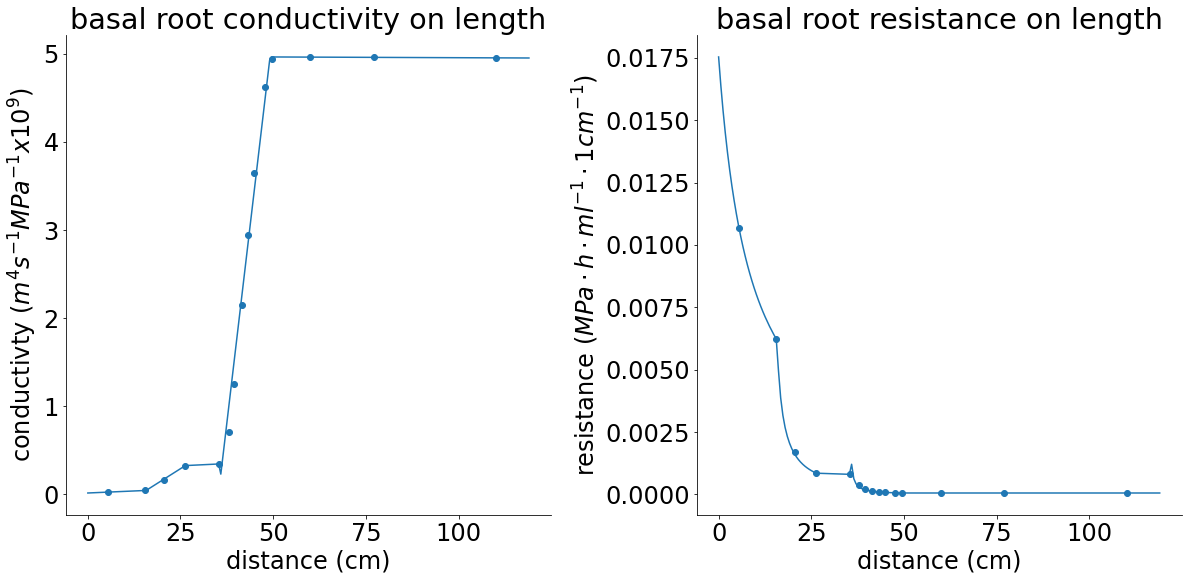

In [153]:
plt.rcParams['figure.figsize'] = [20, 30]
plt.rcParams.update({'font.size': 24})
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)

x_axis_cm = [
5.506136884, 
15.55448305, 
20.57316414, 
26.18098606,
35.34262534,
37.98477221,
39.43565633,
41.46070314,
43.19517371,
44.93363844,
47.69361348,
49.59883503,
59.94275016,
77.08574995,
110.1894737,]

y_axis_r_primary = [
0.02602038694,
0.04459330144,
0.1653671729,
0.3265820678,
0.3453047639,
0.7097233202,
1.256775536,
2.148325359,
2.938572914,
3.647738714,
4.620245475,
4.944247972,
4.962770959,
4.959875182,
4.954283337,  
]

ax = plt.subplot(321)

ax.scatter(x_axis_cm, y_axis_r_primary)
# primary_r_interval = [0, 15, 35, ] 
def k_primary(x):
    if x < 15.55:
        return 0.001848355360491469*x+0.015843089314858807
    elif 26.18> x >= 15.55 :
        return 0.0265794629572805*x-0.3731958224157048
    elif 35.34> x >= 26.18 :
        return 0.0020435967328327315*x +0.2730786902254447
    elif 49.59> x >= 35.34 :
        return 0.35677667926196793*x -12.57081093520535
    elif 120> x >= 49.59 :
        return -0.00016891891420869065*x +4.9728964232362864 
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.title.set_text("basal root conductivity on length")
ax.set_xlabel("distance (cm)")
ax.set_ylabel("conductivty ($m^4 s^{-1} MPa^{-1} x 10^9$)")

#     from conductivity to resistance from m^4 s^-1 MPa^-1 x 10^9  to  MPa h ml^-1 /1 cm
def k_to_r(k): 
    return 10e-9 *100*100*100*100 /3600/k
    
x = np.linspace(0,119,200)
y = np.zeros(200)
for i in range (0,len(x)):
    y[i] = k_primary(x[i])

ax.plot(x, y)


ax = plt.subplot(322)

yc2 = np.zeros(len(x_axis_cm))
for i in range (0,len(x_axis_cm)):
    yc2[i] = k_to_r(y_axis_r_primary[i])

ax.scatter(x_axis_cm,yc2)
x = np.linspace(0,119,200)
y2 = np.zeros(200)
for i in range (0,len(x)):
    y2[i] = k_to_r((k_primary(x[i])))
    
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.title.set_text("basal root resistance on length")
ax.set_xlabel("distance (cm)")
ax.set_ylabel("resistance ($MPa \cdot h \cdot ml^{-1} \cdot 1cm^{-1}$)")    
    
ax.plot(x, y2)

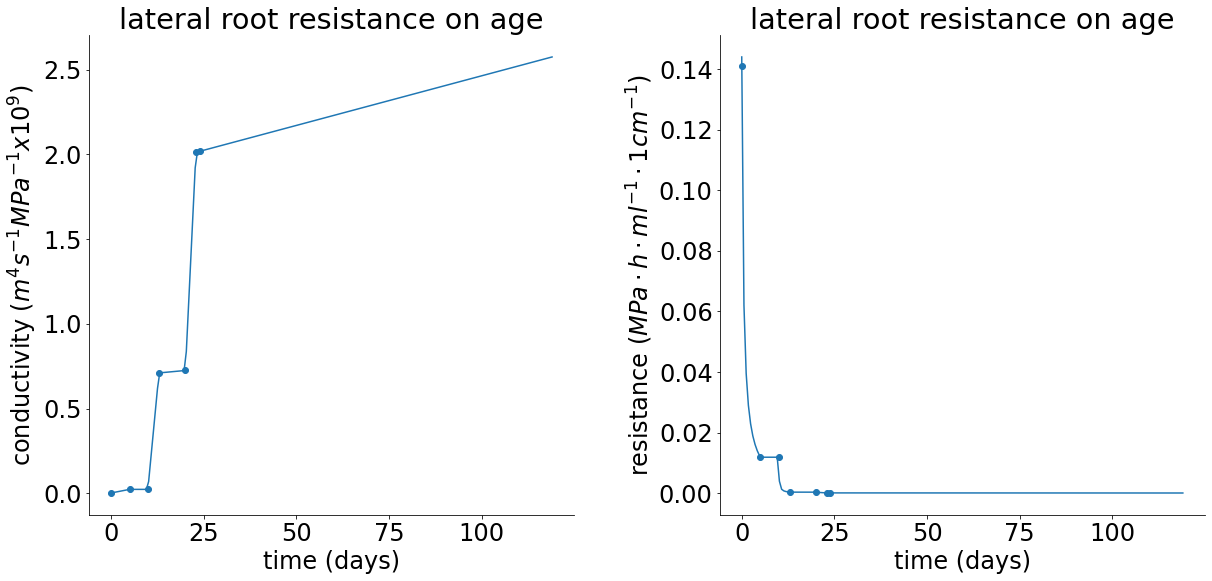

In [154]:
plt.rcParams['figure.figsize'] = [20, 30]
plt.rcParams.update({'font.size': 24})
f = plt.figure()
plt.rcParams.update({'legend.fontsize': 18})
f.subplots_adjust(wspace=0.3)

x_axis_day = [
0.009810055459,
5.020713492,
9.963766575,
12.95495271,
20.08446367,
22.92530994,
23.92745418,]

y_axis_r_lateral = [
0.001971122598,
0.0233102711,
0.02327989941,
0.710208532,
0.7246776045,
2.011526056,
2.017393866,  
]

ax = plt.subplot(321)

ax.scatter(x_axis_day, y_axis_r_lateral)
# primary_r_interval = [0, 15, 35, ] 
def k_lateral(x):
    if x < 5:
        return 0.004258543149115853*x+0.0019293460538895271
    elif  9.96> x >= 5:
        return 0.0000019478470310608697*x+0.02330049151582271
    elif 12.95> x >= 9.96 :
        return 0.22965091485084213*x -2.2649082099802036
    elif 20> x >= 12.95 :
        return 0.0020294621328947786*x + 0.6839169460538098
    elif 23> x >= 20 :
        return 0.45298067054396246*x +-8.373196214574355 
    elif  x >= 23 :
        return 0.005855255182446519*x +1.877292516018327

#     from conductivity to resistance from m^4 s^-1 MPa^-1 x 10^9  to  MPa h ml^-1 /5 cm
def k_to_r(k): 
    return 10e-9 *100*100*100*100 /3600/k
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)    
x = np.linspace(0,119,200)
y = np.zeros(200)
for i in range (0,len(x)):
    y[i] = k_lateral(x[i])

ax.title.set_text("lateral root resistance on age")
ax.set_xlabel("time (days)")
ax.set_ylabel("conductivity ($m^4 s^{-1} MPa^{-1} x 10^9$)")
    
ax.plot(x, y)


ax = plt.subplot(322)

yc2 = np.zeros(len(x_axis_day))
for i in range (0,len(x_axis_day)):
    yc2[i] = k_to_r(y_axis_r_lateral[i])

ax.scatter(x_axis_day,yc2)
x = np.linspace(0,119,200)
y2 = np.zeros(200)
for i in range (0,len(x)):
    y2[i] = k_to_r((k_lateral(x[i])))
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('black')

ax.spines['left'].set_color('black')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.title.set_text("lateral root resistance on age")
ax.set_xlabel("time (days)")
ax.set_ylabel("resistance ($MPa \cdot h \cdot ml^{-1} \cdot 1cm^{-1}$)")    
    
    
ax.plot(x, y2)

In [158]:
name = "small_2020.xml"
# name = "carbon2020_long_stem.xml"
plant = pb.Plant()

plant.openXML("../../modelparameter/plant/" + name)
seeds = plant.getOrganRandomParameter(pb.OrganTypes.seed)
roots = plant.getOrganRandomParameter(pb.OrganTypes.root)
stems = plant.getOrganRandomParameter(pb.OrganTypes.stem)
leafs = plant.getOrganRandomParameter(pb.OrganTypes.leaf)
plant.initialize(True)


carbon_logger = []
growth_rate_logger = []
exudation_logger = []
root_length_logger = []
all_length_logger = []
taproot_n_all = []
k1_logger = []
leaf_logger = []
dict_leaf_logger = []

column_name = ["time", 
               "id", 
               "organ_type", 
               "sub_type", 
               "connect_no", 
               "organ_id",
               "organ_id2",
               "parent_organ",
               "length", 
               "res_main", 
               "carbon_q",
               "c_satis",
               "root_water",
               "rw_satis",
               "c_demand_2" ,                          
               "growth_rate", 
               "exudation", 
               "order",
               "organ_length",
               "coor_x", 
               "coor_y", 
               "coor_z", 
               "connection_1", 
               "connection_2",
              ]
              
pd_output =  pd.DataFrame( [], columns= column_name )

extent = 5000
vml = 0.000143136 *extent
r_trsv = 100/extent
day_i = 0

vol_st = 2.6e-05 * extent 
vmu = 2.82627e95 *extent
r_phl_mb = 0.027157*5000 /extent

# xml_growth_rate = 

In [159]:
g_propotion = lambda water_potential : (20.79 + 83.597* 2.71828**(1.39578* (water_potential)) )/100
# absolute respiration maintenance of plant segment = volumen of the segment * 0.0032
# TODO to see if some other parameters from the output can be used as input
# carbon feedback loop by days.
time = 10
pd_output_1day =  pd.DataFrame( [], columns= column_name )


#     plant.setGeometry(splitBox)
day = time# the step of every loop (day)
hour =24 # the hours of every loop (hour) used in PiafMunch
plant.simulate(time) # start simulation
organ = plant.getOrgans()
ana = pb.SegmentAnalyser(plant)
ana.write("{}{}{}.vtp".format("test",str(name),day_i*day)) #writes vtp the name is followed by the number of days simulated

# plant.write("{}{}{}.py".format(hour,str(name),"1st_test"))
dict_all  = convert( plant ) # convert plant to python outputs
nodes_organtype = dict_all['nodes_organtype']
nodes_coor = python_nodes(plant)
segs = np.array([np.array(s) for s in plant.getSegments()])
node_connection_o = segs
pd_output_1day.loc[:,"id"] = list(map(int,dict_all["nodes_organtype"].T[0]))
pd_output_1day.loc[:,"organ_type"] = list(map(int,dict_all["nodes_organtype"].T[1]))
pd_output_1day.loc[:,"connect_no"] = list(map(int,dict_all["nodes_organtype"].T[2]))

pd_output_1day.loc[:,"coor_x"] = list(nodes_coor.T[3])
pd_output_1day.loc[:,"coor_y"] = list(nodes_coor.T[4])
pd_output_1day.loc[:,"coor_z"] = list(nodes_coor.T[5])

pd_output_1day.loc[:len(dict_all["node_connection"])-1,"connection_1"] = list(map(int,dict_all["node_connection"].T[0]))
pd_output_1day.loc[:len(dict_all["node_connection"])-1,"connection_2"] = list(map(int,dict_all["node_connection"].T[1]))


piafmunch_outputname = name +".ini" # set the name of the parameters
Soil_water = [0]*(len(dict_all['node_connection'])+1) # initiate soil water potentil
organ_radius = [0]*((len(organ))) # initiate the radius of each segment
k1 = [0]*(len(dict_all['node_connection'])+1) # k1 parameter in equation
kt = [0]*(len(dict_all['node_connection'])+1) # total carbon maintenance

node_id_to_organ = [0]*plant.getNumberOfNodes() #
node_id_to_subtype = [0]*plant.getNumberOfNodes() #
node_id_to_organ2 = [0]*plant.getNumberOfNodes() #



########################################## python nodes conversion #########################################


# sink nodes (nodes have one connection and on the right hand side)
N1R_node = nodes_organtype[(nodes_organtype[:,1] ==2 ) & (nodes_organtype[:,2] ==1 )] # remove seed. get roots with one connection
# source nodes
N1L_node = nodes_organtype[ ((nodes_organtype[:,1] ==4)|(nodes_organtype[:,1] ==3)  ) & (nodes_organtype[:,2] ==1 )] # remove seed. get stem or leaf with one connection
leaf_logger.append(len(N1L_node)) 

########################## nodewise iteration to know which organ it belongs to ###########################################
########################## nodewise iteration to get maximal  ###########################################  

# need more check 
#
for k in reversed(range(len(organ))):  # loop through all the organs
    organ_radius[k] = organ[k].getParam().a #the diameter of one organ
    j=0

    for j in range(1,organ[k].getNumberOfNodes()): # loop through all segments in one organs
        node_id_to_organ[organ[k].getNodeId(j)]=k # set an id, so we can get the organ number from a node number
        node_id_to_organ2[organ[k].getNodeId(j)]=organ[k].getId()
        node_id_to_subtype[organ[k].getNodeId(j)] = int(organ[k].getParameter("subType"))


        volumen = organ_radius[k]**2*3.1415926* organ[k].getOrganRandomParameter().dx
        phloem_per_section = 1#4200
        m_r = 0.0032 # Organ maintenance respiration rate (gCO2 g−1 DM)
        mass_per_volumen = 0.10 #root dry mass per unit volume (gDM cm−3) 0.05-0.14
        Carbon_main = volumen *0.0032*0.1/(24) *1000/12 # (1000/12) from grams/day/cm3 to mmol/hour/cm3 calculate the maintenance by volume (mmol)
        #Carbon_main = 1
        # print("maintenance is : ", Carbon_main) # absolute carbon maintentance
        k1[organ[k].getNodeId(j)] = Carbon_main 
k1_logger.append(np.sum(k1))
taproot_length = [0] * (len(plant.getOrgans())-2)
all_organ_length = [0] * (len(plant.getOrgans())-2)
taproot_n = []
for root_n, root in enumerate(plant.getOrgans()): # recrusive get all the roots
    if root.organType() == 2 and root.getParent().organType()==1: #make sure it is taproot
        taproot_n.append(root_n)
taproot_n_all.append(taproot_n)
         ############################# water potential in left and right !root! ##################################################
soil_wp = 0.8
dry_soil = 0.8
wet_soil = 0.8
#     here need more development 
for i in range(1):
    for node_i,root_node in enumerate(N1R_node): # get all segments in one organs
        node_organ= node_id_to_organ [int(root_node[0])-1]
        organ_i = organ[ node_organ ] 
        print(node_i, organ_i.organType(), root_node,organ_i.param().subType, organ_i.getParent().getId() )
        if node_organ == taproot_n[0]:  # first taproot
            Soil_water[node_organ] = wet_soil
        elif node_organ == taproot_n[1]: 
            Soil_water[node_organ] = soil_wp
        elif node_organ == taproot_n[2]:  
            Soil_water[node_organ] = dry_soil

        elif organ_i.getParent().getId() == 1:
            Soil_water[node_organ] = wet_soil
        elif organ_i.getParent().getId() == 2:
            Soil_water[node_organ] = soil_wp
        elif organ_i.getParent().getId() == 3:
            Soil_water[node_organ] = dry_soil
        else:
            Soil_water[node_organ] = soil_wp


organ_number_to_order = [0] *len(organ)
for k in reversed(range(len(organ))):  # loop through all the organs
    if organ[k].getParent().organType() == 1:
        organ_number_to_order[k] = 1
    elif organ[k].getParent().getParent().organType() == 1:
        organ_number_to_order[k] = 2
    elif organ[k].getParent().getParent().getParent().organType() == 1:
        organ_number_to_order[k] = 3
    elif organ[k].getParent().getParent().getParent().getParent().organType() == 1:
        organ_number_to_order[k] = 4
    elif organ[k].getParent().getParent().getParent().getParent().getParent().organType() == 1:
        organ_number_to_order[k] = 5
    else:
        organ_number_to_order[k] = 6

i=0
for i in range(len(nodes_organtype)):
    oder_number = organ_number_to_order[node_id_to_organ[i]]
    pd_output_1day.loc[i,"order"] = oder_number 
    if oder_number == 1:
        pd_output_1day.loc[i,"parent_organ"] = 0
    else:
        pd_output_1day.loc[i,"parent_organ"] = organ[node_id_to_organ[i]].getParent().getId()
#         print("node_id_to_organ[i]", node_id_to_organ[i])
#         print("organ_number_to_order[node_id_to_organ[i]]", organ_number_to_order[node_id_to_organ[i]])        


############################# water potential in left and right !boxex! ##################################################
#     for i, roottip in enumerate(N1R_node): 
#         if left.getDist(plant.getNodes()[int(roottip[0])-1]) <0: # if it is in the left box
#             Soil_water[i] = 0.1 # unit is added with a minus sign, actuall value is -0.2
#         elif right.getDist(plant.getNodes()[int(roottip[0])-1]) <0: # if it is in the right box
#             Soil_water[i] = 0.1 # actuall value is -0.5
#         else:
#             Soil_water[i] = 0.1 # actuall value is -0.1

nodes_length = np.zeros(len(nodes_coor))
for i in range(1,len(nodes_coor)):
    if nodes_coor[i][1]==2: #if the organtype is root
        nodes_length[i] = (nodes_length[node_connection_o[(node_connection_o[:,1] == i)][0][0]]  
                           + ((nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][3] -nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][3])**2 
                            + (nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][4] -nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][4])**2 
                            + (nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][5] -nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][5])**2)**(0.5) )
    else:
        nodes_length[i] = (nodes_length[node_connection_o[(node_connection_o[:,1] == i)][0][0]] 
                           + ((nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][3]-nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][3])**2 
                              + (nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][4]-nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][4])**2 
                              + (nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][0]][5]-nodes_coor[node_connection_o[(node_connection_o[:,1] == i)][0][1]][5])**2)**(0.5) )


axial_r_xylem = []
for i in range(0,(len(dict_all["node_connection"]))):
    second_node = dict_all["node_connection"].T[1][i]-1 # the node connection starts with node 1

    if plant.getOrgans()[node_id_to_organ[second_node]].getParent().getOrganRandomParameter().subType == 0:
        axial_r_xylem.append(
           k_to_r(k_primary(max(0 ,plant.getOrgans()[node_id_to_organ[second_node]].getLength() - np.abs(nodes_length[second_node])*100))))
    else:
        axial_r_xylem.append( k_to_r(k_lateral(plant.getSegmentCTs()[i])) )

axial_r_phloem = []
for i in range(0,(len(dict_all["node_connection"]))):
    #     print(plant.getOrgans()[node_id_to_organ[i]].getOrganRandomParameter().subType)
    second_node = dict_all["node_connection"].T[1][i]-1 # the node connection starts with node 1
    phloem_radius = plant.getOrgans()[node_id_to_organ[second_node]].getOrganRandomParameter().a
    resistance_propotional =0.04 *(0.2**4)/phloem_radius**4 # based on hagen poissuelle's law
    # print(plant.getOrgans()[node_id_to_organ[second_node]].getOrganRandomParameter().a)
    axial_r_phloem.append(resistance_propotional)


def devide_20(x):
    return x/4

axial_r_xylem_0_25cm = map(devide_20, axial_r_xylem)
################################# coupling layer with piafmunch ###################################################
homo_st = [0.04]*(len(dict_all["node_connection"]))
# pass the absolute carbon maintentance to piafmunch
write_PiafMunch_parameter(dict_all['node_connection'], 
                          dict_all['nodes_organtype'], 
                           axial_r_phloem, 
                          dict_all['unq_cnt'], 
                          Soil_water, 
                          k1, 
                          piafmunch_outputname,
                          hour, 
                          list(axial_r_xylem_0_25cm), 
                          vml, 
                          vol_st, 
                          vmu, 
                          r_phl_mb,
                          r_trsv)

0 2 [56.  2.  1.  1.] 2 1
1 2 [114.   2.   1.   1.] 2 1
2 2 [158.   2.   1.   1.] 2 1
3 2 [185.   2.   1.   1.] 2 1
4 2 [193.   2.   1.   1.] 1 0
5 2 [248.   2.   1.   1.] 2 2
6 2 [306.   2.   1.   1.] 2 2
7 2 [350.   2.   1.   1.] 2 2
8 2 [377.   2.   1.   1.] 2 2
9 2 [385.   2.   1.   1.] 4 0
10 2 [440.   2.   1.   1.] 2 3
11 2 [498.   2.   1.   1.] 2 3
12 2 [542.   2.   1.   1.] 2 3
13 2 [569.   2.   1.   1.] 2 3
14 2 [577.   2.   1.   1.] 4 0
output successful


## 5.2 Postprocessing
use paraview to load the following python script.

In [ ]:
#### import the simple module from the paraview
from paraview.simple import *
#### disable automatic camera reset on 'Show'
paraview.simple._DisableFirstRenderCameraReset()

# find source
tube1 = FindSource('Tube1')

# set active source
SetActiveSource(tube1)

# create a new 'Threshold'
threshold1 = Threshold(Input=tube1)
threshold1.Scalars = ['POINTS', 'order']
threshold1.ThresholdRange = [0.0, 3.0]

# Properties modified on threshold1
threshold1.Scalars = ['CELLS', 'creationTime']

# get active view
renderView1 = GetActiveViewOrCreate('RenderView')
# uncomment following to set a specific view size
# renderView1.ViewSize = [930, 504]
typeLUT = GetColorTransferFunction('organtype')
# show data in view
threshold1Display = Show(threshold1, renderView1)
# trace defaults for the display properties.
threshold1Display.ColorArrayName = ['CELLS', 'organType']
threshold1Display.LookupTable = typeLUT
threshold1Display.ScalarOpacityUnitDistance = 0.4049429502949595

# hide data in view
tube1 = FindSource('Tube1')
Hide(tube1, renderView1)

# show color bar/color legend
threshold1Display.SetScalarBarVisibility(renderView1, True)

# Properties modified on threshold1
threshold1.ThresholdRange = [0.0, 49.24366475880146]

# get animation track
threshold1ThresholdBetweenTrack = GetAnimationTrack('ThresholdBetween', index=1, proxy=threshold1)

# create keyframes for this animation track

# create a key frame
keyFrame8395 = CompositeKeyFrame()
keyFrame8395.KeyValues = [0.24258199334144592]

# create a key frame
keyFrame8396 = CompositeKeyFrame()
keyFrame8396.KeyTime = 1.0
keyFrame8396.KeyValues = [60.0]

# initialize the animation track
threshold1ThresholdBetweenTrack.KeyFrames = [keyFrame8395, keyFrame8396]

# get animation scene
animationScene1 = GetAnimationScene()

# Properties modified on animationScene1
animationScene1.NumberOfFrames = 300

# Properties modified on animationScene1
animationScene1.AnimationTime = 0.0


In [ ]:
from IPython.display import HTML
HTML('GeometryViewer.html')